In [1]:
import argparse

import numpy as np
import pandas as pd

import matplotlib.cm as cm
import glob

In [2]:
import matplotlib.pyplot as plt
from utils import prepare_plt, stylize_axis, WIDTH_2COLUMNS, WIDTH_PAGE, PAD_INCHES, fname_to_dict, dict_to_fname

prepare_plt(plt, usetex=True)

../results/align_test=True,align_train=True,depth=0,diff=0.5,diff_type=random,epochs=1000,layer_align_test=True,layer_align_train=True,lr=0.01,mom=0.9,seed=100,task=cifar10_vgg19,width=0/log.pkl
(74, 17)
(74, 17)


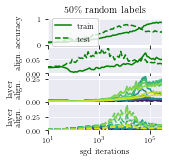

../results/align_test=True,align_train=True,depth=0,diff=0.5,diff_type=random,epochs=1000,layer_align_test=True,layer_align_train=True,lr=0.003,mom=0.9,seed=100,task=cifar10_vgg19,width=0/log.pkl
(74, 17)
(74, 17)


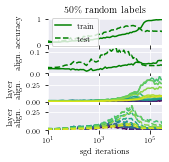

../results/align_test=True,align_train=True,depth=0,diff=0.0,diff_type=random,epochs=1000,layer_align_test=True,layer_align_train=True,lr=0.01,mom=0.9,seed=100,task=cifar10_vgg19,width=0/log.pkl
(74, 17)
(74, 17)


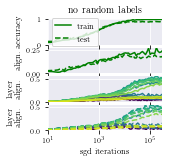

../results/align_test=True,align_train=True,depth=0,diff=0.0,diff_type=random,epochs=1000,layer_align_test=True,layer_align_train=True,lr=0.001,mom=0.9,seed=100,task=cifar10_vgg19,width=0/log.pkl
(41, 17)
(41, 17)


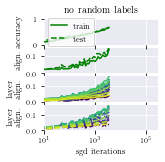

../results/align_test=True,align_train=True,depth=0,diff=0.2,diff_type=random,epochs=1000,layer_align_test=True,layer_align_train=True,lr=0.003,mom=0.9,seed=100,task=cifar10_vgg19,width=0/log.pkl
(74, 17)
(74, 17)


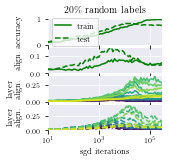

../results/align_test=True,align_train=True,depth=0,diff=0.2,diff_type=random,epochs=1000,layer_align_test=True,layer_align_train=True,lr=0.01,mom=0.9,seed=100,task=cifar10_vgg19,width=0/log.pkl
(74, 17)
(74, 17)


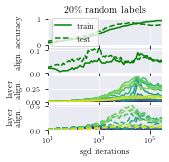

../results/align_test=True,align_train=True,depth=0,diff=0.0,diff_type=random,epochs=1000,layer_align_test=True,layer_align_train=True,lr=0.003,mom=0.9,seed=100,task=cifar10_vgg19,width=0/log.pkl
(74, 17)
(74, 17)


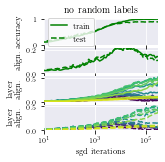

../results/align_test=True,align_train=True,depth=0,diff=0.0,diff_type=random,epochs=1000,layer_align_test=True,layer_align_train=True,lr=0.0055,mom=0.9,seed=100,task=cifar10_vgg19,width=0/log.pkl
(40, 17)
(40, 17)


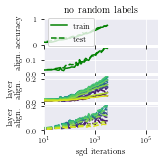

In [22]:
xlims = (10, 3e5)
xscale='log'

for f in glob.glob('../results/*epochs=1000*layer_align_test=True,layer_align_train=True*/log.pkl'):
    print(f)
    axes = []
    
    args = fname_to_dict(f.split('/')[2])

    log = pd.read_pickle(f)
    
    plt.figure(figsize=(WIDTH_PAGE / 3 - 2 * PAD_INCHES,
                        WIDTH_PAGE / 3 - 2 * PAD_INCHES))

    axes.append(plt.subplot2grid((4, 1), (1, 0)))
    plt.xscale(xscale)
    plt.plot(log['iteration'], log['align_train'], label='alignment', color='green')
    plt.plot(log['iteration'], log['align_test'], label='alignment', color='green', linestyle='--')
    try:
        plt.ylim(0, max(log['align_train'].max(), log['align_test'].max()))
    except:
        plt.ylim(0, max(max([v.item() for v in log['align_train']]),
                        max([v.item() for v in log['align_test']])))
    plt.ylabel('align.')
    plt.grid()
    plt.xlim(*xlims)
#     plt.legend()
    plt.xlabel('sgd iterations')
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    stylize_axis(plt.gca())

    axes.append(plt.subplot2grid((4, 1), (0, 0)))
    plt.xscale(xscale)
#     plt.plot(log['iteration'], log['test_mnist_acc'], label='test easy')
#     plt.plot(log['iteration'], log['test_kmnist_acc'], label='test difficult')
#     plt.plot(log['iterations'], log['train_loss'], '--', label='train loss')
#     plt.plot(log['iterations'], log['test_loss'], '--', label='test loss')
    plt.ylim(0, 1)
    plt.ylabel('accuracy')
#     plt.ylim(.5, 1.02)
    plt.grid()
    plt.xlim(*xlims)
    plt.setp(plt.gca().get_xticklabels(), visible=False)
    stylize_axis(plt.gca())
    
#     plt.twinx()
    plt.plot(log['iteration'], log['train_acc'], '-', label='train', color='green')
    plt.plot(log['iteration'], log['test_acc'], '--', label='test', color='green')
    plt.legend(loc='center left')
    if float(args['diff']) == 0:
        plt.title('no random labels')
    else:
        plt.title('%d\\%% random labels' %
                  (int(float(args['diff']) * 100)))

    stylize_axis(plt.gca(), grid=False)
    
    ### ALIGN TRAIN
    
    axes.append(plt.subplot2grid((4, 1), (2, 0)))
    plt.xscale(xscale)
    
    layer_alignments = []
    for la in log['layer_align_train']:
        layer_alignments.append(la)
    layer_alignments = np.array(layer_alignments)
    print(layer_alignments.shape)
    
    for i in range(layer_alignments.shape[1]):
        plt.plot(log['iteration'], layer_alignments[:, i], color=cm.viridis(i / layer_alignments.shape[1]))
    plt.ylim(0, layer_alignments.max())
    plt.ylabel('layer\nalign.')
    plt.grid()
    plt.xlim(*xlims)
#     plt.legend()
#     plt.xlabel('sgd iterations')
    stylize_axis(plt.gca())
    plt.setp(plt.gca().get_xticklabels(), visible=False)

    
    ### ALIGN TEST
    
    axes.append(plt.subplot2grid((4, 1), (3, 0)))
    plt.xscale(xscale)
    
    layer_alignments = []
    for la in log['layer_align_test']:
        layer_alignments.append(la)
    layer_alignments = np.array(layer_alignments)
    print(layer_alignments.shape)
    
    for i in range(layer_alignments.shape[1]):
        plt.plot(log['iteration'], layer_alignments[:, i], color=cm.viridis(i / layer_alignments.shape[1]), linestyle='--')
    plt.ylim(0, layer_alignments.max())
    plt.ylabel('layer\nalign.')
    plt.grid()
    plt.xlim(*xlims)
#     plt.legend()
    plt.xlabel('sgd iterations')
    stylize_axis(plt.gca())

    plt.subplots_adjust(hspace=.1)
    plt.gcf().align_ylabels(axes)
    
    out_f = dict_to_fname(args)
    plt.savefig('./alignments/' + out_f + '.pdf', bbox_inches = "tight")
    plt.show()